# Predicting Podium Results and Points Results in the F1 Data.

In [1]:
# !pip install --quiet --upgrade pip

In [2]:
# !pip install pandas scikit-learn matplotlib seaborn xgboost lightgbm --quiet

In [3]:
# pip install --upgrade --force-reinstall scipy

In [4]:
# pip install --upgrade pandas --quiet

In [5]:
# pip install --upgrade numpy matplotlib seaborn

In [6]:
# !pip install category_encoders --quiet

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

In [8]:
df= pd.read_csv('F1 Races 2020-2024.csv')

In [9]:
df.head()

,year,round,circuitId,date,rainy,Turns,Length,driverId,constructorId,grid,...,laps,statusId,Weighted_Top_3_Probability,Weighted_Top_3_Prob_Length,position_previous_race,nro_cond_escuderia,raceId,points,prom_points_10,Top 3 Finish
0,2000,1,1,2000-03-12,0,14,5.278,2,20,15,...,56,12,0.087719,0.090909,8.0,2,158,0.0,9.4,0
1,2000,1,1,2000-03-12,0,14,5.278,14,1,2,...,11,5,0.208333,0.222222,20.0,2,158,0.0,47.6,0
2,2000,1,1,2000-03-12,0,14,5.278,15,17,6,...,35,5,0.048387,0.083333,20.0,2,158,0.0,8.5,0
3,2000,1,1,2000-03-12,0,14,5.278,18,3,21,...,46,5,0.160494,0.235294,20.0,2,158,0.0,1.2,0
4,2000,1,1,2000-03-12,0,14,5.278,21,22,9,...,58,1,0.076923,0.100000,11.0,1,158,2.0,4.5,0


In [10]:
df.head(25)

,year,round,circuitId,date,rainy,Turns,Length,driverId,constructorId,grid,...,laps,statusId,Weighted_Top_3_Probability,Weighted_Top_3_Prob_Length,position_previous_race,nro_cond_escuderia,raceId,points,prom_points_10,Top 3 Finish
0,2000,1,1,2000-03-12,0,14,5.278,2,20,15,...,56,12,0.087719,0.090909,8.0,2,158,0.0,9.400000,0
1,2000,1,1,2000-03-12,0,14,5.278,14,1,2,...,11,5,0.208333,0.222222,20.0,2,158,0.0,47.600000,0
2,2000,1,1,2000-03-12,0,14,5.278,15,17,6,...,35,5,0.048387,0.083333,20.0,2,158,0.0,8.500000,0
3,2000,1,1,2000-03-12,0,14,5.278,18,3,21,...,46,5,0.160494,0.235294,20.0,2,158,0.0,1.200000,0
4,2000,1,1,2000-03-12,0,14,5.278,21,22,9,...,58,1,0.076923,0.100000,11.0,1,158,2.0,4.500000,0
5,2000,1,1,2000-03-12,0,14,5.278,22,6,4,...,58,1,0.322581,0.416667,3.0,2,158,6.0,39.400000,1
6,2000,1,1,2000-03-12,0,14,5.278,23,3,11,...,58,1,0.146341,0.250000,4.0,1,158,4.0,36.500000,1
7,2000,1,1,2000-03-12,0,14,5.278,25,22,14,...,58,1,0.090909,0.000000,17.0,2,158,0.0,10.500000,0
8,2000,1,1,2000-03-12,0,14,5.278,30,6,3,...,58,1,0.568627,0.400000,1.0,1,158,10.0,86.500000,1
9,2000,1,1,2000-03-12,0,14,5.278,35,16,8,...,58,1,0.033333,0.000000,7.0,1,158,3.0,9.300000,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9839 entries, 0 to 9838
Data columns (total 34 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   year                                                            9839 non-null   int64  
 1   round                                                           9839 non-null   int64  
 2   circuitId                                                       9839 non-null   int64  
 3   date                                                            9839 non-null   object 
 4   rainy                                                           9839 non-null   int64  
 5   Turns                                                           9839 non-null   int64  
 6   Length                                                          9839 non-null   float64
 7   driverId                                           

In [12]:
# Set seaborn style
sns.set(style="whitegrid")

C:\Users\meher\AppData\Local\Temp\ipykernel_40224\1831809022.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Top 3 Finish", data=df, ax=axes[0], palette="Set2")


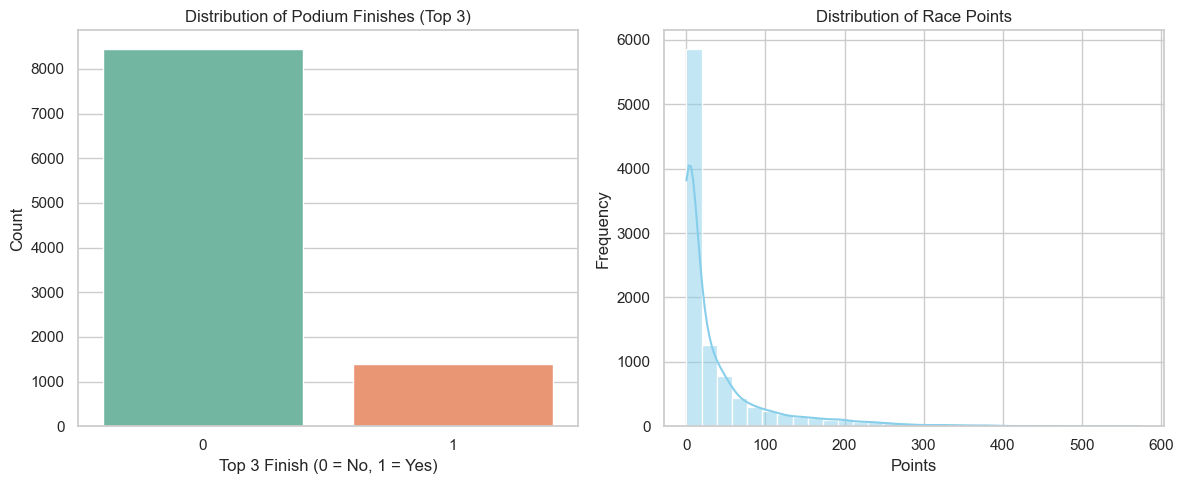

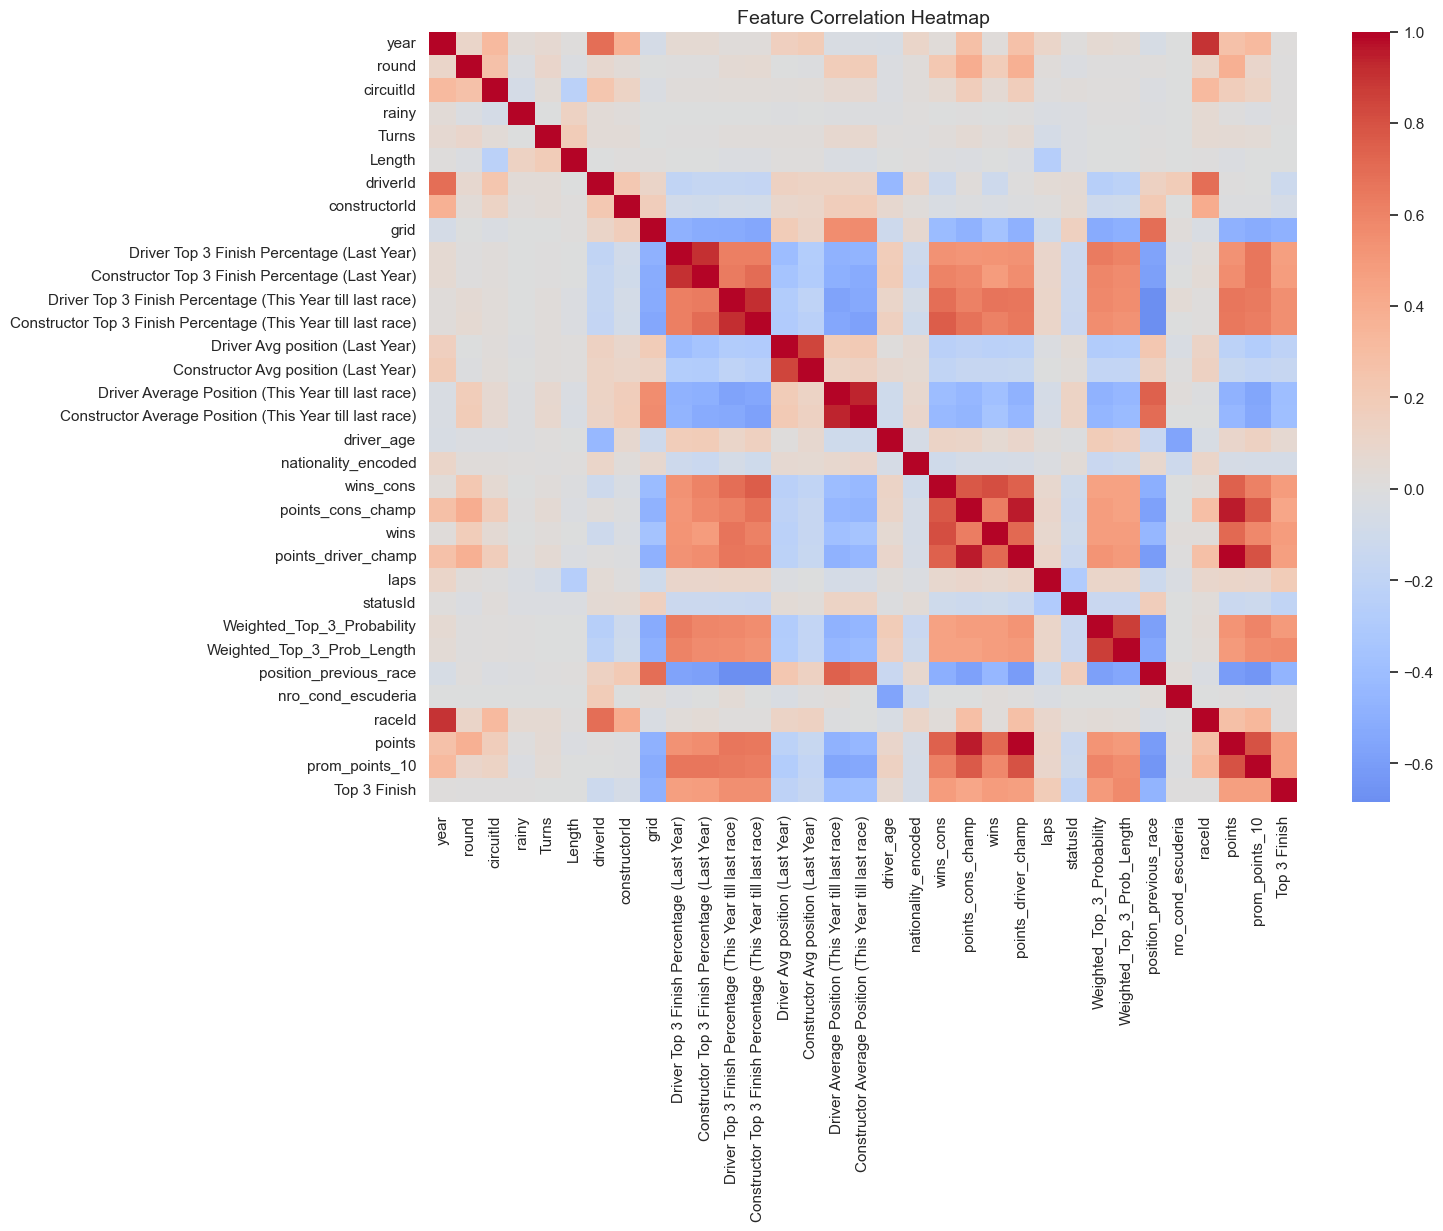

C:\Users\meher\AppData\Local\Temp\ipykernel_40224\1831809022.py:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="grid", y="Top 3 Finish", data=df, ci=None, palette="Blues_d")
C:\Users\meher\AppData\Local\Temp\ipykernel_40224\1831809022.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="grid", y="Top 3 Finish", data=df, ci=None, palette="Blues_d")


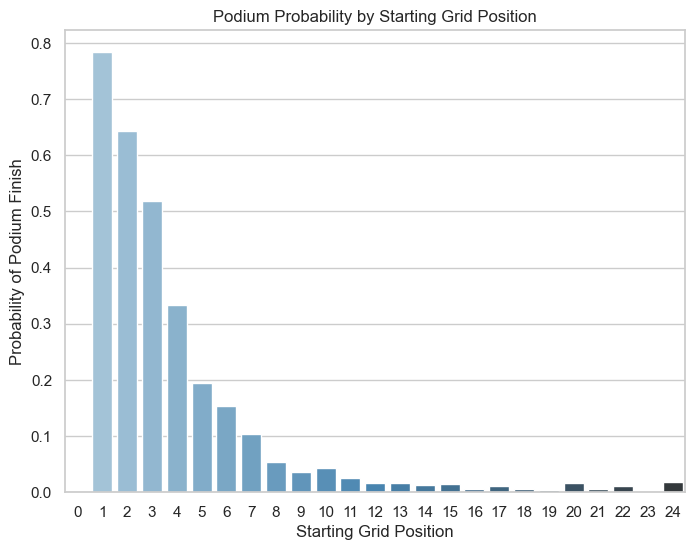

C:\Users\meher\AppData\Local\Temp\ipykernel_40224\1831809022.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Top 3 Finish", y="Weighted_Top_3_Probability", data=df, palette="Set3")


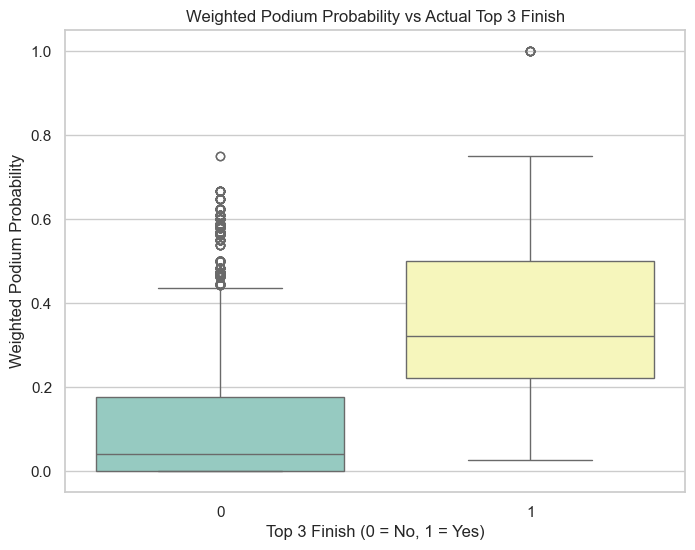

In [13]:
# ===============================================
# Step 3: Distribution of Target Variables
# ===============================================
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Top 3 Finish distribution
sns.countplot(x="Top 3 Finish", data=df, ax=axes[0], palette="Set2")
axes[0].set_title("Distribution of Podium Finishes (Top 3)")
axes[0].set_xlabel("Top 3 Finish (0 = No, 1 = Yes)")
axes[0].set_ylabel("Count")

# Plot Points distribution
sns.histplot(df["points"], bins=30, ax=axes[1], kde=True, color="skyblue")
axes[1].set_title("Distribution of Race Points")
axes[1].set_xlabel("Points")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# ===============================================
# Step 4: Correlation Heatmap
# ===============================================
plt.figure(figsize=(14, 10))
corr = df.corr(numeric_only=True)  # Only numeric columns
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

# ===============================================
# Step 5: Grid Position vs Podium Probability
# ===============================================
plt.figure(figsize=(8, 6))
sns.barplot(x="grid", y="Top 3 Finish", data=df, ci=None, palette="Blues_d")
plt.title("Podium Probability by Starting Grid Position")
plt.xlabel("Starting Grid Position")
plt.ylabel("Probability of Podium Finish")
plt.show()

# ===============================================
# Step 6: Weighted Podium Probability vs Actual Top 3 Finish
# ===============================================
plt.figure(figsize=(8, 6))
sns.boxplot(x="Top 3 Finish", y="Weighted_Top_3_Probability", data=df, palette="Set3")
plt.title("Weighted Podium Probability vs Actual Top 3 Finish")
plt.xlabel("Top 3 Finish (0 = No, 1 = Yes)")
plt.ylabel("Weighted Podium Probability")
plt.show()


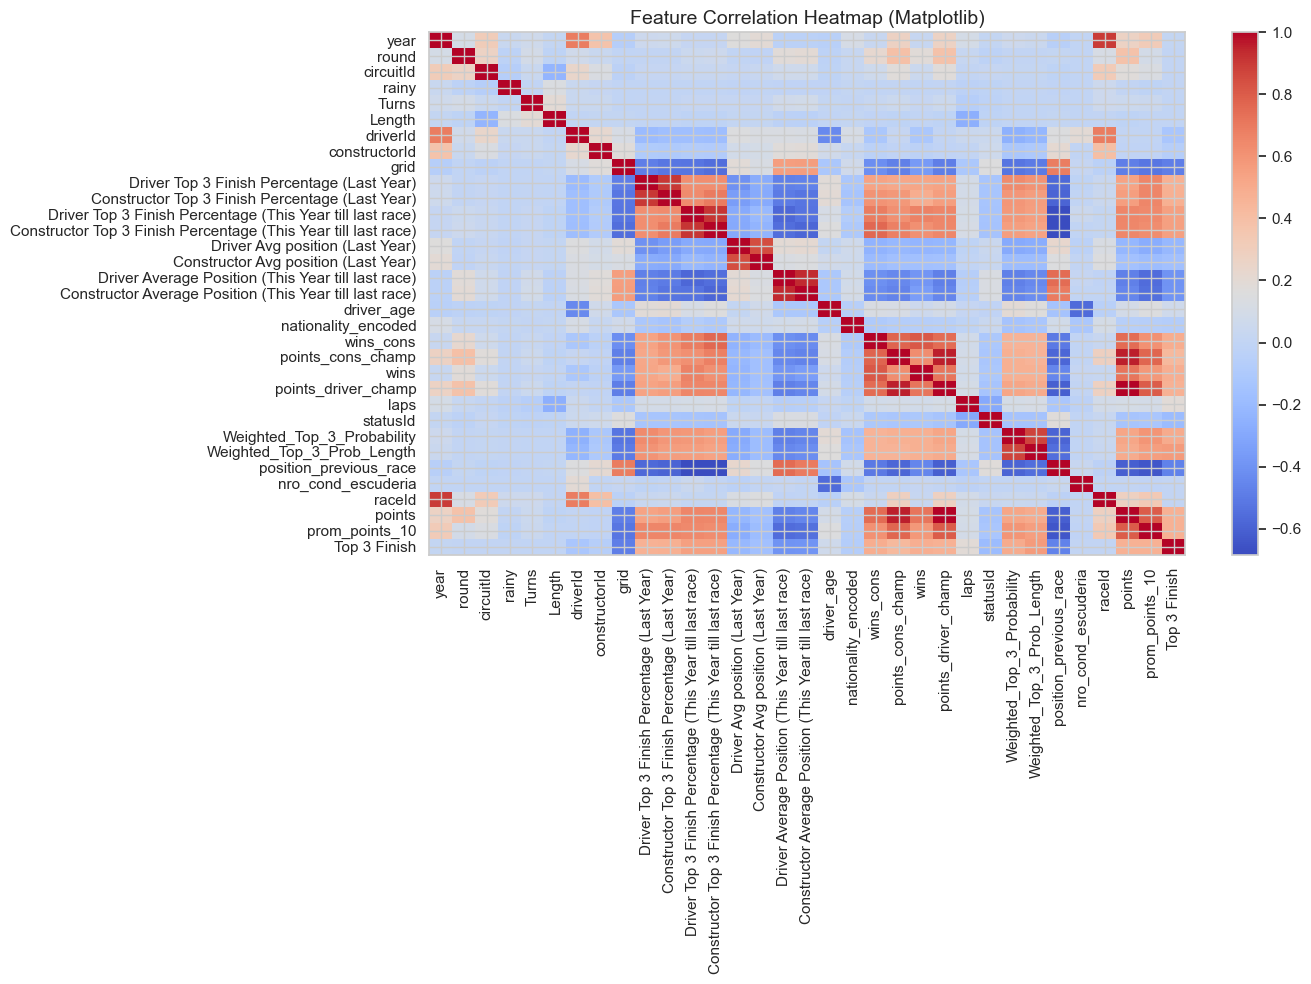

In [14]:
plt.figure(figsize=(14, 10))

# Compute correlation
corr = df.corr(numeric_only=True)

# Create heatmap
im = plt.imshow(corr, cmap="coolwarm", interpolation="nearest", aspect="auto")
plt.colorbar(im)

# Add ticks
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

# Title
plt.title("Feature Correlation Heatmap (Matplotlib)", fontsize=14)
plt.tight_layout()
plt.show()

In [15]:
dfr = df.copy()

In [16]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9839 entries, 0 to 9838
Data columns (total 34 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   year                                                            9839 non-null   int64  
 1   round                                                           9839 non-null   int64  
 2   circuitId                                                       9839 non-null   int64  
 3   date                                                            9839 non-null   object 
 4   rainy                                                           9839 non-null   int64  
 5   Turns                                                           9839 non-null   int64  
 6   Length                                                          9839 non-null   float64
 7   driverId                                           

In [17]:
dfr.head(10)

,year,round,circuitId,date,rainy,Turns,Length,driverId,constructorId,grid,...,laps,statusId,Weighted_Top_3_Probability,Weighted_Top_3_Prob_Length,position_previous_race,nro_cond_escuderia,raceId,points,prom_points_10,Top 3 Finish
0,2000,1,1,2000-03-12,0,14,5.278,2,20,15,...,56,12,0.087719,0.090909,8.0,2,158,0.0,9.4,0
1,2000,1,1,2000-03-12,0,14,5.278,14,1,2,...,11,5,0.208333,0.222222,20.0,2,158,0.0,47.6,0
2,2000,1,1,2000-03-12,0,14,5.278,15,17,6,...,35,5,0.048387,0.083333,20.0,2,158,0.0,8.5,0
3,2000,1,1,2000-03-12,0,14,5.278,18,3,21,...,46,5,0.160494,0.235294,20.0,2,158,0.0,1.2,0
4,2000,1,1,2000-03-12,0,14,5.278,21,22,9,...,58,1,0.076923,0.100000,11.0,1,158,2.0,4.5,0
5,2000,1,1,2000-03-12,0,14,5.278,22,6,4,...,58,1,0.322581,0.416667,3.0,2,158,6.0,39.4,1
6,2000,1,1,2000-03-12,0,14,5.278,23,3,11,...,58,1,0.146341,0.250000,4.0,1,158,4.0,36.5,1
7,2000,1,1,2000-03-12,0,14,5.278,25,22,14,...,58,1,0.090909,0.000000,17.0,2,158,0.0,10.5,0
8,2000,1,1,2000-03-12,0,14,5.278,30,6,3,...,58,1,0.568627,0.400000,1.0,1,158,10.0,86.5,1
9,2000,1,1,2000-03-12,0,14,5.278,35,16,8,...,58,1,0.033333,0.000000,7.0,1,158,3.0,9.3,0


In [18]:
drop_cols = ['points', 'Top 3 Finish', 'date', 'raceId']
dfr.drop(columns=drop_cols, inplace=True)

In [19]:
dfr.head(10)

,year,round,circuitId,rainy,Turns,Length,driverId,constructorId,grid,Driver Top 3 Finish Percentage (Last Year),...,points_cons_champ,wins,points_driver_champ,laps,statusId,Weighted_Top_3_Probability,Weighted_Top_3_Prob_Length,position_previous_race,nro_cond_escuderia,prom_points_10
0,2000,1,1,0,14,5.278,2,20,15,0.0,...,0.0,0.0,0.0,56,12,0.087719,0.090909,8.0,2,9.4
1,2000,1,1,0,14,5.278,14,1,2,0.0,...,0.0,0.0,0.0,11,5,0.208333,0.222222,20.0,2,47.6
2,2000,1,1,0,14,5.278,15,17,6,0.0,...,0.0,0.0,0.0,35,5,0.048387,0.083333,20.0,2,8.5
3,2000,1,1,0,14,5.278,18,3,21,0.0,...,4.0,0.0,0.0,46,5,0.160494,0.235294,20.0,2,1.2
4,2000,1,1,0,14,5.278,21,22,9,0.0,...,2.0,0.0,2.0,58,1,0.076923,0.100000,11.0,1,4.5
5,2000,1,1,0,14,5.278,22,6,4,0.0,...,16.0,0.0,6.0,58,1,0.322581,0.416667,3.0,2,39.4
6,2000,1,1,0,14,5.278,23,3,11,0.0,...,4.0,0.0,4.0,58,1,0.146341,0.250000,4.0,1,36.5
7,2000,1,1,0,14,5.278,25,22,14,0.0,...,2.0,0.0,0.0,58,1,0.090909,0.000000,17.0,2,10.5
8,2000,1,1,0,14,5.278,30,6,3,0.0,...,16.0,1.0,10.0,58,1,0.568627,0.400000,1.0,1,86.5
9,2000,1,1,0,14,5.278,35,16,8,0.0,...,4.0,0.0,3.0,58,1,0.033333,0.000000,7.0,1,9.3


In [20]:
# Check total null values per column
null_counts = df.isnull().sum()

print("Null values per column:")
print(null_counts)

# To see columns that actually have missing values (filter zeroes out)
print("\nColumns with missing values:")
print(null_counts[null_counts > 0])

Null values per column:
year                                                              0
round                                                             0
circuitId                                                         0
date                                                              0
rainy                                                             0
Turns                                                             0
Length                                                            0
driverId                                                          0
constructorId                                                     0
grid                                                              0
Driver Top 3 Finish Percentage (Last Year)                        0
Constructor Top 3 Finish Percentage (Last Year)                   0
Driver Top 3 Finish Percentage (This Year till last race)         0
Constructor Top 3 Finish Percentage (This Year till last race)    0
Driver Avg position (Las

In [21]:
for col in dfr.columns:
    print(col)


year
round
circuitId
rainy
Turns
Length
driverId
constructorId
grid
Driver Top 3 Finish Percentage (Last Year)
Constructor Top 3 Finish Percentage (Last Year)
Driver Top 3 Finish Percentage (This Year till last race)
Constructor Top 3 Finish Percentage (This Year till last race)
Driver Avg position (Last Year)
Constructor Avg position (Last Year)
Driver Average Position (This Year till last race)
Constructor Average Position (This Year till last race)
driver_age
nationality_encoded
wins_cons
points_cons_champ
wins
points_driver_champ
laps
statusId
Weighted_Top_3_Probability
Weighted_Top_3_Prob_Length
position_previous_race
nro_cond_escuderia
prom_points_10


In [22]:
# Initialize target encoder for high-cardinality features
target_enc = ce.TargetEncoder(cols=['driverId', 'constructorId'])

In [23]:
from sklearn.preprocessing import LabelEncoder

# Label encode driverId and constructorId (simple integer encoding)
for col in ['driverId', 'constructorId']:
    le = LabelEncoder()
    dfr[col] = le.fit_transform(dfr[col])

# One-hot encode low-cardinality categorical variables
dfr = pd.get_dummies(dfr, columns=['statusId', 'nationality_encoded'], drop_first=True)


In [24]:
dfr.head()

,year,round,circuitId,rainy,Turns,Length,driverId,constructorId,grid,Driver Top 3 Finish Percentage (Last Year),...,nationality_encoded_24,nationality_encoded_25,nationality_encoded_26,nationality_encoded_27,nationality_encoded_28,nationality_encoded_29,nationality_encoded_30,nationality_encoded_31,nationality_encoded_32,nationality_encoded_33
0,2000,1,1,0,14,5.278,1,19,15,0.0,...,False,False,False,False,False,False,False,False,False,False
1,2000,1,1,0,14,5.278,13,0,2,0.0,...,False,False,False,False,False,False,False,False,False,False
2,2000,1,1,0,14,5.278,14,16,6,0.0,...,False,False,False,False,False,False,False,False,False,False
3,2000,1,1,0,14,5.278,17,2,21,0.0,...,False,False,False,False,False,False,False,False,False,False
4,2000,1,1,0,14,5.278,20,21,9,0.0,...,False,False,False,False,False,False,False,False,False,False


In [25]:
y = df['points']


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming dfr and y are ready
X_train, X_test, y_train, y_test = train_test_split(
    dfr, y, test_size=0.25, random_state=42
)


### Random Forest Regression

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

# Train
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)



In [44]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Test MAE: {mae:.3f}")


Test MAE: 0.749


In [45]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"Test R²: {r2:.3f}")


Test R²: 0.999


In [46]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.3f}")


Test MSE: 1.979


In [47]:
from sklearn.metrics import explained_variance_score

evs = explained_variance_score(y_test, y_pred)
print(f"Explained Variance Score: {evs:.3f}")


Explained Variance Score: 0.999


Evaluation Metrics:
RMSE: 1.407
MAE: 0.749
MSE: 1.979
R² Score: 0.999
Explained Variance Score: 0.999


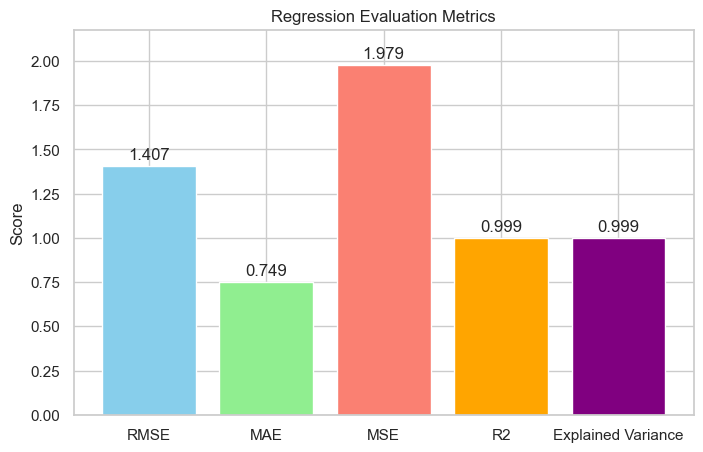

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are defined from your model predictions

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

# Print results
print(f"Evaluation Metrics:")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"R² Score: {r2:.3f}")
print(f"Explained Variance Score: {evs:.3f}")

# Plot metrics
metrics = {'RMSE': rmse, 'MAE': mae, 'MSE': mse, 'R2': r2, 'Explained Variance': evs}

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics.keys(), metrics.values(), color=['skyblue', 'lightgreen', 'salmon', 'orange', 'purple'])
plt.title("Regression Evaluation Metrics")
plt.ylabel("Score")
plt.ylim(0, max(metrics.values()) * 1.1)

# Annotate bars with metric values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{yval:.3f}", ha='center', va='bottom')

plt.show()


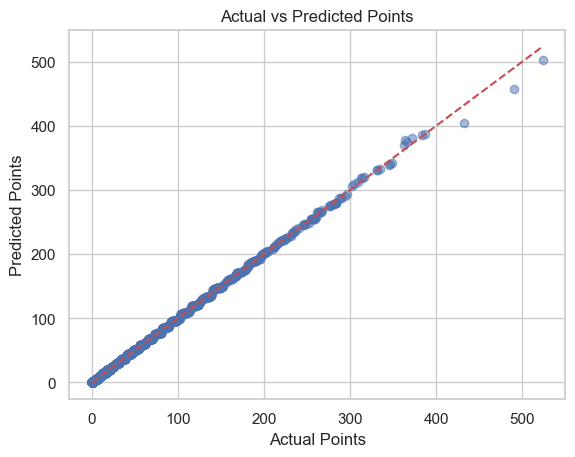

In [49]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Points")
plt.ylabel("Predicted Points")
plt.title("Actual vs Predicted Points")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


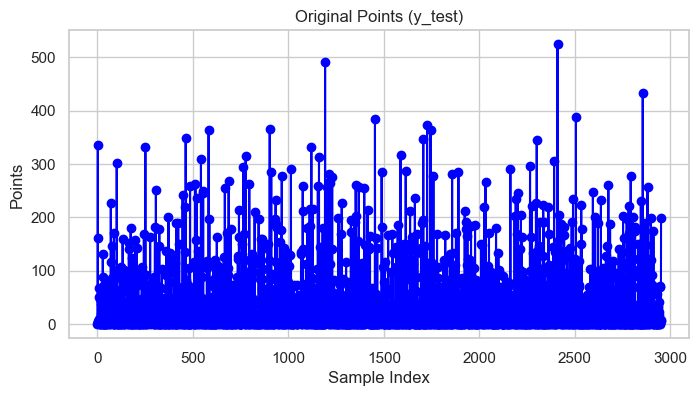

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(y_test.values, marker='o', linestyle='-', color='blue')
plt.title("Original Points (y_test)")
plt.xlabel("Sample Index")
plt.ylabel("Points")
plt.show()


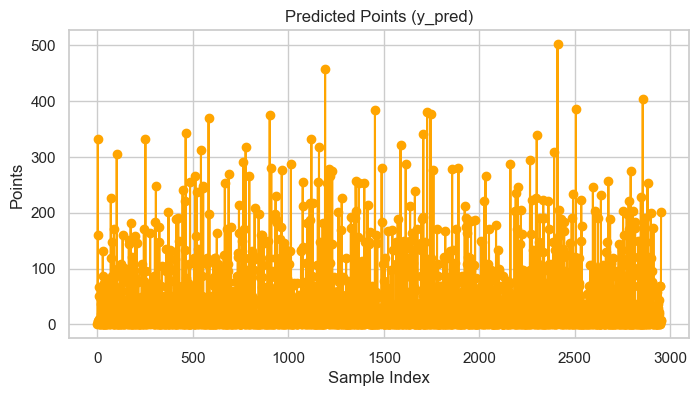

In [51]:
plt.figure(figsize=(8,4))
plt.plot(y_pred, marker='o', linestyle='-', color='orange')
plt.title("Predicted Points (y_pred)")
plt.xlabel("Sample Index")
plt.ylabel("Points")
plt.show()


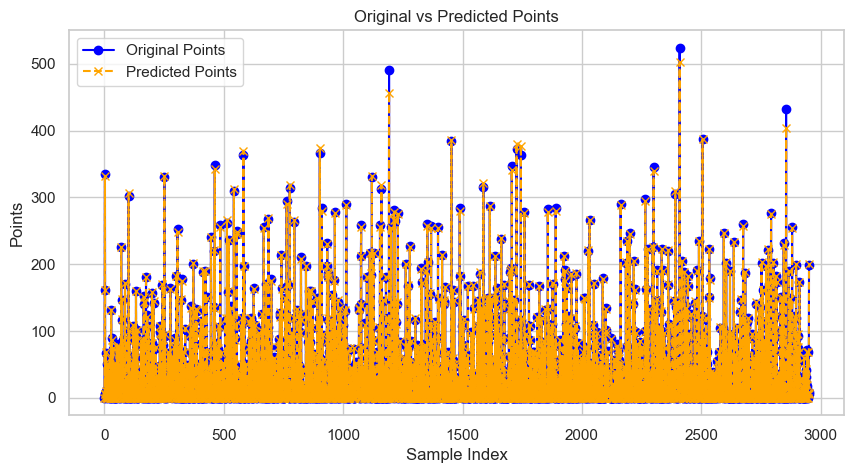

In [52]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, marker='o', linestyle='-', color='blue', label='Original Points')
plt.plot(y_pred, marker='x', linestyle='--', color='orange', label='Predicted Points')
plt.title("Original vs Predicted Points")
plt.xlabel("Sample Index")
plt.ylabel("Points")
plt.legend()
plt.show()


### XG Boost